In [1]:
from sketch import *
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
data = np.load("../data/Caltech101_small.npy")
neigh = SketchKNN(n_neighbors=10, sketch_size = 50, random_state = 0)
neigh.fit(data)

SketchKNN(candidates_scale=20, group_size=None, group_threshold=None,
     n_neighbors=10, random_state=0, sketch_method=None, sketch_size=50,
     strip_window=50)

true Index:  [[0, 5661, 4373, 5660, 4359]]
[array([   0, 5661, 5660, 2468, 3126], dtype=int64)]
[array([   0, 5661, 5660, 2468, 3126], dtype=int64)]
[array([   0, 5661, 5660, 2468, 3126], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
7151 [1600]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
7151 [1600]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
7151 [1600]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]
[array([   0, 5661, 4373, 5660, 4359], dtype=int64)]


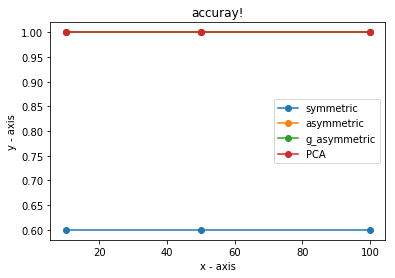

In [5]:
domain1 = [10,50,100];
resultAccuracy = []
len_query = 5
trueIndex = neigh.kneighbors(data[:1,:],n_neighbors = len_query)
trueIndex = trueIndex.tolist();
print("true Index: ",trueIndex)
top = 0;
end = len(domain1)
for i in domain1:   
    result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'symmetric', candidates_scale = 20)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 

y1 = resultAccuracy 

# line 1 points 
x1 = domain1 
# plotting the line 1 points  
plt.plot(x1, y1, marker='o',label = "symmetric") 

resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'asymmetric', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y2 = resultAccuracy  
# line 2 points 
x2 = domain1 
# plotting the line 2 points  
plt.plot(x2, y2, marker='o',label = "asymmetric") 

resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'g_asymmetric', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y3 = resultAccuracy  
# line 2 points 
x3 = domain1
# plotting the line 2 points  
plt.plot(x3, y3, marker='o',label = "g_asymmetric")


resultAccuracy = []
top = 0;
end = len(domain1)
for i in domain1:   
    dists, result = neigh.kneighbors(data[:1,:],n_neighbors = len_query, sketch_method = 'PCA', return_distance=True, candidates_scale = i)
    print(result)
    for re_list in result:
        top = 0;
        for j in trueIndex:
            for element in j:
                if element in re_list:
                    top += 1
        resultAccuracy.append(top/len_query) 
         
y4 = resultAccuracy  
# line 2 points 
x4 = domain1
# plotting the line 2 points  
plt.plot(x4, y4, label = "PCA",marker='o')
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('accuray!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 













In [ ]:
import time
domain1 = [10,50,100];
resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y1 = resultRunningTime  



# line 1 points
x1 = domain1

# plotting the line 1 points  
plt.plot(x1, y1, label = "line 1") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y2 = resultRunningTime  

# line 2 points 
x2 = domain1 
# plotting the line 2 points  
plt.plot(x2, y2, label = "line 2") 


resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y3 = resultRunningTime  

# line 2 points 
x3 = domain1

# plotting the line 2 points  
plt.plot(x3, y3, label = "line 3")



resultRunningTime = []
top = 0;
end = len(domain1)
for i in domain1:
    start_time = time.time()
    result = some_function(i)
    resultRunningTime.append(time.time() - start_time)
         
y4 = resultRunningTime  

# line 2 points 
x4 = domain1
# plotting the line 2 points  
plt.plot(x4, y4, label = "line 4")
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('runnung time!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 
